# MNIST dataset

In [1]:
from __future__ import print_function

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import LabelBinarizer
import ann_util

# Load the MNIST dataset

In [2]:
# The MNIST database of handwritten digits, available from this page, 
# has a training set of 60,000 examples, and a test set of 10,000 examples.
# 28 x 28 pixels

# text version of http://yann.lecun.com/exdb/mnist/ (Yann LeCun)
# has TEST ERROR RATE (%) for different approaches - so check it out!

# unzip the files at /data/mnist/mnist_train_data.zip
data_fname = 'data/mnist/mnist_test_data.txt'
label_fname = 'data/mnist/mnist_test_label.txt'

In [3]:
X = [] # sample
y = [] # label
with open(data_fname, 'r') as fd, open(label_fname, 'r') as fl:
    for line in fd:
        img = line.split()
        pixels = [int(pixel) for pixel in img]
        X.append(pixels)
    for line in fl:
        label = int(line)
        y.append(label)

In [4]:
X = np.array(X, np.float)
y = np.array(y, np.float)
print(X.shape)
print(y.shape)

(10000L, 784L)
(10000L,)


In [5]:
# for consistency
X_test, y_test = X, y

# Visualize

In [6]:
def print_digits(X, y, y_pred=None):
    # set up the figure
    fig = plt.figure(figsize=(6, 6))  # figure size in inches
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    
    n = np.min([25, len(X)])
    for i in range(n):
        img = X[i]
        img = np.array(img, np.float)
        img = img.reshape((28, 28))

        ax = fig.add_subplot(5, 5, i + 1, xticks=[], yticks=[])
        ax.imshow(img, cmap=plt.cm.binary, interpolation='nearest')

        # label the image with the target value
        if y_pred is None:
            ax.text(0, 7, str(int(y[i])), color='b')
        elif y_pred[i] == y[i]:
            ax.text(0, 7, str(int(y_pred[i])), color='g')
        else:
            ax.text(0, 7, str(int(y_pred[i])), color='r')

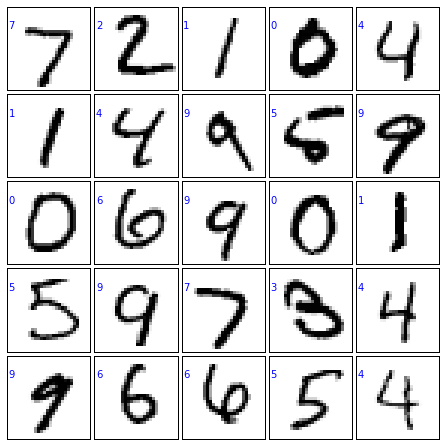

In [7]:
print_digits(X_test, y_test)

# Transform the data

In [8]:
# scale
X -= X.min()
X /= X.max()

In [9]:
ylb = LabelBinarizer()
ylb.fit(y)

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

# Load a saved ANN model

In [10]:
# load a nn model ex: /models/nn_mnist_iter1600000.pickle
model_fname = 'nn_mnist_iter1600000.pickle'
nn = ann_util.deserialize('models/' + model_fname)

In [11]:
# print the layer sizes
for layer in nn.layers:
    print(layer.id, layer.n_neurons)

0 784
1 300
2 10


In [12]:
# skip this cell to process all testing data
# use the first 1000 samples to speed up
X_test = X_test[:1000]
y_test = y_test[:1000]

# Predict

In [13]:
preds = np.array([nn.predict(record) for record in X_test])

In [14]:
y_pred = ylb.inverse_transform(preds)

# Measure

In [15]:
print(confusion_matrix(y_test, y_pred))

[[ 85   0   0   0   0   0   0   0   0   0]
 [  0 124   1   0   0   0   0   0   1   0]
 [  0   1 114   0   0   0   0   1   0   0]
 [  0   0   0 105   0   1   0   1   0   0]
 [  0   0   1   0 109   0   0   0   0   0]
 [  0   0   0   1   0  83   1   1   1   0]
 [  2   0   0   0   0   0  85   0   0   0]
 [  0   0   0   1   0   0   0  98   0   0]
 [  0   0   2   0   0   0   0   1  86   0]
 [  0   0   0   1   0   0   0   1   1  91]]


In [16]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99        85
        1.0       0.99      0.98      0.99       126
        2.0       0.97      0.98      0.97       116
        3.0       0.97      0.98      0.98       107
        4.0       1.00      0.99      1.00       110
        5.0       0.99      0.95      0.97        87
        6.0       0.99      0.98      0.98        87
        7.0       0.95      0.99      0.97        99
        8.0       0.97      0.97      0.97        89
        9.0       1.00      0.97      0.98        94

avg / total       0.98      0.98      0.98      1000



In [17]:
print(accuracy_score(y_test, y_pred))

0.98


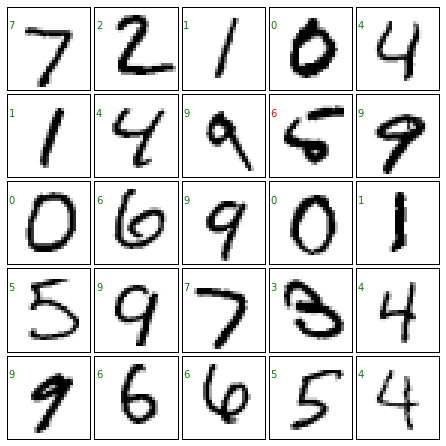

In [18]:
print_digits(X_test, y_test, y_pred)

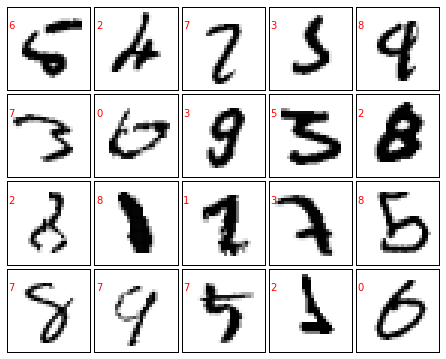

In [19]:
failed = y_pred != y_test
X2_test = X_test[failed] 
y2_pred = y_pred[failed] 
y2_test = y_test[failed]
print_digits(X2_test, y2_test, y2_pred)

# Congratulations!